# [Basic Usage 基本使用](https://matplotlib.org/stable/tutorials/introductory/usage.html)

This tutorial covers some basic usage patterns and best practices to help you get started with Matplotlib.

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## A simple example 一个简单的例子
Matplotlib graphs your data on [Figure](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure)s (e.g., windows, Jupyter widgets, etc.), each of which can contain one or more [Axes](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes), an area where points can be specified in terms of x-y coordinates (or theta-r in a polar plot, x-y-z in a 3D plot, etc). The simplest way of creating a Figure with an Axes is using [pyplot.subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots). We can then use [Axes.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot) to draw some data on the Axes:  
Matplotlib 将您的数据绘制在图形上（例如，窗口、Jupyter 小部件等），每个图形都可以包含一个或多个轴，一个可以根据 x-y 坐标（或极坐标图中的 theta-r， 3D 图中的 x-y-z 等）。 使用轴创建图形的最简单方法是使用 pyplot.subplots。 然后我们可以使用 Axes.plot 在轴上绘制一些数据：

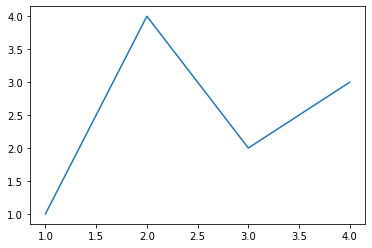

In [3]:
fig, ax = plt.subplots() # Create a figure containing a single axes. 创建一个包含单个轴的图形。
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]); # Plot some data on the axes. 在轴上绘制一些数据。

## Parts of a Figure
Here are the components of a Matplotlib Figure.

![](https://matplotlib.org/stable/_images/anatomy.png)

### Figure

The whole figure. The Figure keeps track of all the child Axes, a group of 'special' Artists (titles, figure legends, colorbars, etc), and even nested subfigures.

The easiest way to create a new Figure is with pyplot:

<Figure size 432x288 with 0 Axes>

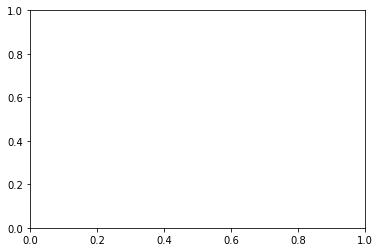

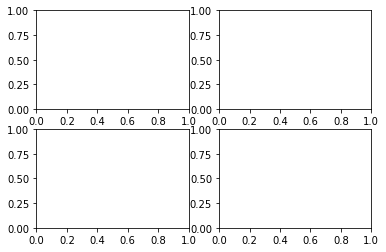

In [8]:
fig = plt.figure() # an empty figure with no Axes 没有轴的空图
fig, ax = plt.subplots() # a figure with a single Axes 单个轴的图
fig, axs = plt.subplots(2, 2) # a figure with a 2x2 grid of Axes


It is often convenient to create the Axes together with the Figure, but you can also manually add Axes later on. Note that many [Matplotlib backends](https://matplotlib.org/stable/users/explain/backends.html) support zooming and panning on figure windows.

### Axes 坐标系

An Axes is an Artist attached to a Figure that contains a region for plotting data, and usually includes two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) that provide ticks and tick labels to provide scales for the data in the Axes. Each Axes also has a title (set via [set_title()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html#matplotlib.axes.Axes.set_title)), an x-label (set via [set_xlabel()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html#matplotlib.axes.Axes.set_xlabel)), and a y-label set via [set_ylabel()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html#matplotlib.axes.Axes.set_ylabel)).

The Axes class and its member functions are the primary entry point to working with the OOP interface, and have most of the plotting methods defined on them (e.g. ax.plot(), shown above, uses the plot method)

### Axis 坐标

These objects set the scale and limits and generate ticks (the marks on the Axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter. The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.

### Artist 图

Basically, everything visible on the Figure is an Artist (even Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collections objects, Patch objects, etc. When the Figure is rendered, all of the Artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

## Types of inputs to plotting functions

Plotting functions expect [numpy.array](https://numpy.org/doc/stable/reference/generated/numpy.array.html#numpy.array) or [numpy.ma.masked_array](https://numpy.org/doc/stable/reference/generated/numpy.ma.masked_array.html#numpy.ma.masked_array) as input, or objects that can be passed to [numpy.asarray](https://numpy.org/doc/stable/reference/generated/numpy.asarray.html#numpy.asarray). Classes that are similar to arrays ('array-like') such as pandas data objects and [numpy.matrix](https://numpy.org/doc/stable/reference/generated/numpy.matrix.html#numpy.matrix) may not work as intended. Common convention is to convert these to numpy.array objects prior to plotting. For example, to convert a [numpy.matrix](https://numpy.org/doc/stable/reference/generated/numpy.matrix.html#numpy.matrix)

In [11]:
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)

[[1 2]
 [3 4]]


Most methods will also parse an addressable object like a dict, a [numpy.recarray](https://numpy.org/doc/stable/reference/generated/numpy.recarray.html#numpy.recarray), or a [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame). Matplotlib allows you provide the `data` keyword argument and generate plots passing the strings corresponding to the `x` and `y` variables.

Text(0, 0.5, 'entry b')

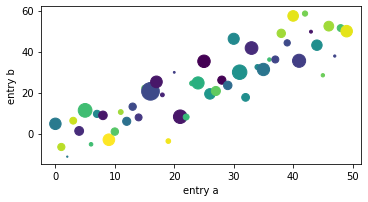

In [15]:
np.random.seed(19680801) # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')

## Coding styles

### The object-oriented and the pyplot interfaces

As noted above, there are essentially two ways to use Matplotlib:

* Explicitly create Figures and Axes, and call methods on them (the "object-oriented (OO) style").

* Rely on pyplot to automatically create and manage the Figures and Axes, and use pyplot functions for plotting.

So one can use the OO-style

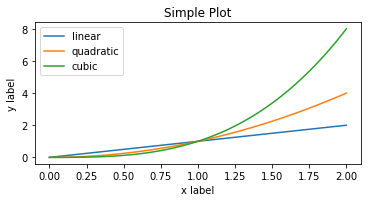

In [19]:
x = np.linspace(0, 2, 100) # Sample data

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear') # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic') # Plot more data on the axes...
ax.plot(x, x**3, label='cubic') # ... and some more.
ax.set_xlabel('x label') # Add an x-label to the axes.
ax.set_ylabel('y label') # Add a y-label to the axes.
ax.set_title('Simple Plot') # Add a title to the axes.
ax.legend()

or the pyplot-style:

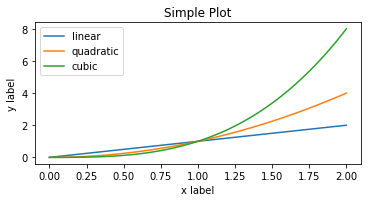

In [20]:
x = np.linspace(0, 2, 100)

plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear') # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic') # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title('Simple Plot')
plt.legend()

(In addition, there is a third approach, for the case when embedding Matplotlib in a GUI application, which completely drops pyplot, even for figure creation. See the corresponding section in the gallery for more info: [Embedding Matplotlib in graphical user interfaces](https://matplotlib.org/stable/gallery/index.html#user-interfaces).)

Matplotlib's documentation and examples use both the OO and the pyplot styles. In general, we suggest using the OO style, particularly for complicated plots, and functions and scripts that are intended to be reused as part of a larger project. However, the pyplot style can be very convenient for quick interactive work.

> Note
> 
> You may find older examples that use the `pylab` interface, via from `pylab import *`. This approach is strongly deprecated.

### Making a helper functions 制作辅助函数

If you need to make the same plots over and over again with different data sets, or want to easily wrap Matplotlib methods, use the recommended signature function below. 如果您需要使用不同的数据集一遍又一遍地绘制相同的图，或者想要轻松包装 Matplotlib 方法，请使用下面推荐的签名函数。

In [21]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

which you would then use twice to populate two subplots:

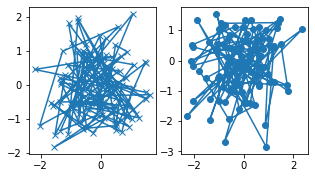

In [29]:
data1, data2, data3, data4 = np.random.randn(4, 100) # make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

Note that if you want to install these as a python package, or any other customizations you could use one of the many templates on the web; Matplotlib has one at [mpl-cookiecutter](https://github.com/matplotlib/matplotlib-extension-cookiecutter)

## Styling Artists

Most plotting methods have styling options for the Artists, accessible either when a plotting method is called, or from a "setter" on the Artist. In the plot below we manually set the color, linewidth, and linestyle of the Artists created by plot, and we set the linestyle of the second line after the fact with set_linestyle.

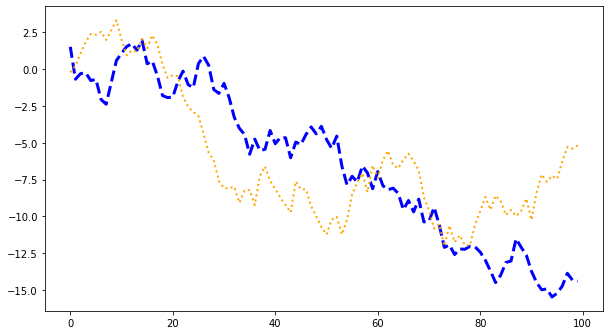

In [30]:
fig, ax = plt.subplots(figsize=(10, 5.6))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle(':')

### Colors

Matplotlib has a very flexible array of colors that are accepted for most Artists; see the colors tutorial for a list of specifications. Some Artists will take multiple colors. i.e. for a scatter plot, the edge of the markers can be different colors from the interior:

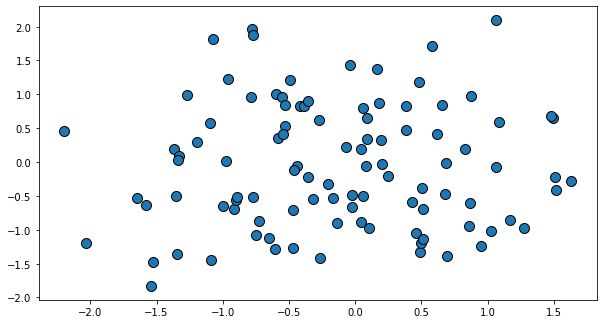

In [32]:
fig, ax = plt.subplots(figsize=(10, 5.4))
ax.scatter(data1, data2, s=100, facecolor='C0', edgecolor='k')

### Linewidths, linestyles, and markersizes

Line widths are typically in typographic points (1 pt = 1/72 inch) and available for Artists that have stroked lines. Similarly, stroked lines can have a linestyle. See the [linestyles example](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html).

Marker size depends on the method being used. plot specifies markersize in points, and is generally the "diameter" or width of the marker. scatter specifies markersize as approximately proportional to the visual area of the marker. There is an array of markerstyles available as string codes (see markers), or users can define their own [MarkerStyle](https://matplotlib.org/stable/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle) (see [Marker reference](https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html)):

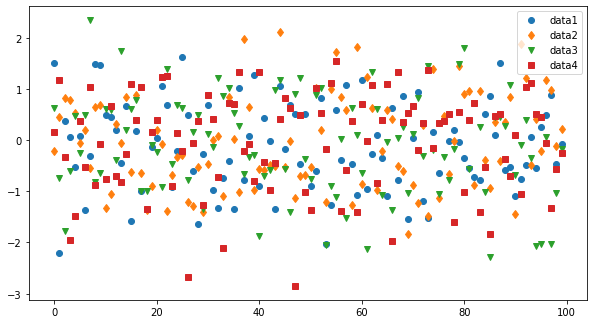

In [34]:
fig, ax = plt.subplots(figsize=(10, 5.4))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend()

## Labelling plots
### Axes labels and text

[set_xlabel](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html#matplotlib.axes.Axes.set_xlabel), [set_ylabel](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html#matplotlib.axes.Axes.set_ylabel), and [set_title](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html#matplotlib.axes.Axes.set_title) are used to add text in the indicated locations (see Text in Matplotlib Plots for more discussion). Text can also be directly added to plots using text:

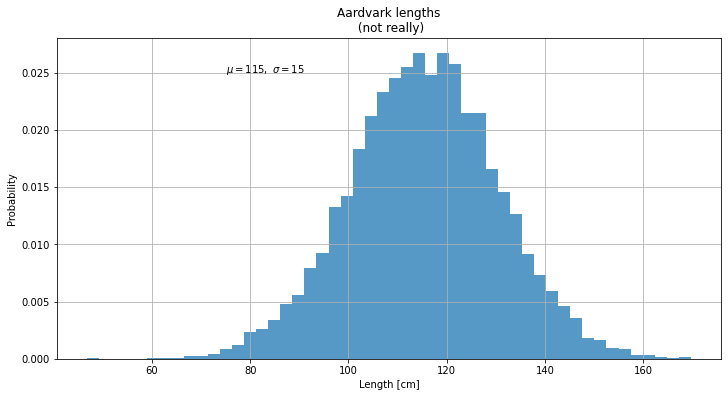

In [41]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(10, 5.4), layout='constrained')
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=1, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.grid(True)

All of the text functions return a [matplotlib.text.Text](https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text) instance. Just as with lines above, you can customize the properties by passing keyword arguments into the text functions:

In [42]:
t = ax.set_xlabel('my data', fontsize=14, color='red')

These properties are covered in more detail in Text properties and layout.

### Using mathematical expressions in text

Matplotlib accepts TeX equation expressions in any text expression. For example to write the expression $\sigma_i = 15$ in the title, you can write a TeX expression surrounded by dollar signs:

In [43]:
ax.set_title(r'$\sigma_i=15$')

Text(0.5, 1.0, '$\\sigma_i=15$')

where the `r` preceding the title string signifies that the string is a raw string and not to treat backslashes as python escapes. Matplotlib has a built-in TeX expression parser and layout engine, and ships its own math fonts – for details see [Writing mathematical expressions](https://matplotlib.org/stable/tutorials/text/mathtext.html). You can also use LaTeX directly to format your text and incorporate the output directly into your display figures or saved postscript – see [Text rendering with LaTeX](https://matplotlib.org/stable/tutorials/text/usetex.html).
### Annotations
We can also annotate points on a plot, often by connecting an arrow pointing to xy, to a piece of text at xytext:

(-2.0, 2.0)

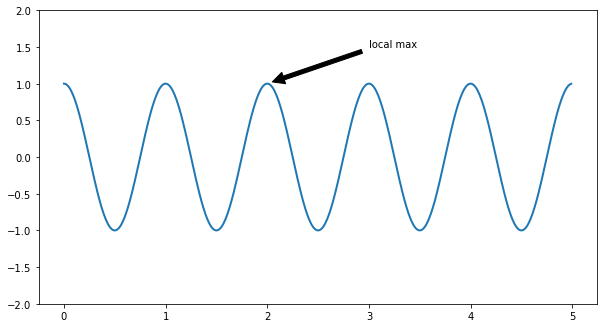

In [52]:
fig, ax = plt.subplots(figsize=(10, 5.4))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5), arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(-2, 2)

In this basic example, both xy and xytext are in data coordinates. There are a variety of other coordinate systems one can choose -- see [Basic annotation](https://matplotlib.org/stable/tutorials/text/annotations.html#annotations-tutorial) and [Advanced Annotations](https://matplotlib.org/stable/tutorials/text/annotations.html#plotting-guide-annotation) for details. More examples also can be found in Annotating Plots.

### Legends

Often we want to identify lines or markers with a [Axes.legend](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html#matplotlib.axes.Axes.legend):

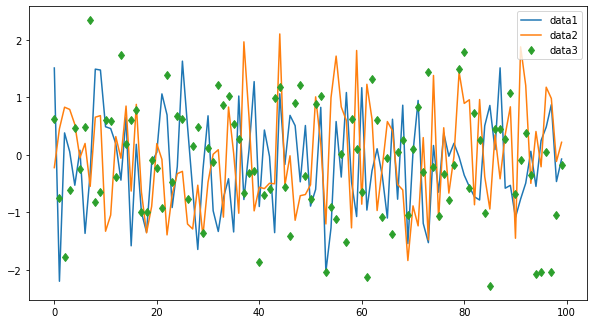

In [57]:
fig, ax = plt.subplots(figsize=(10, 5.4))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.legend()

Legends in Matplotlib are quite flexible in layout, placement, and what Artists they can represent. They are discussed in detail in [Legend guide](https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html).

## Axis scales and ticks

Each Axes has two (or three) Axis objects representing the x- and y-axis. These control the scale of the Axis, the tick locators and the tick formatters. Additional Axes can be attached to display further Axis objects.

### Scales

In addition to the linear scale, Matplotlib supplies non-linear scales, such as a log-scale. Since log-scales are used so much there are also direct methods like [loglog](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.loglog.html#matplotlib.axes.Axes.loglog), [semilogx](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.semilogx.html#matplotlib.axes.Axes.semilogx), and [semilogy](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.semilogy.html#matplotlib.axes.Axes.semilogy). There are a number of scales (see [Scales](https://matplotlib.org/stable/gallery/scales/scales.html) for other examples). Here we set the scale manually:

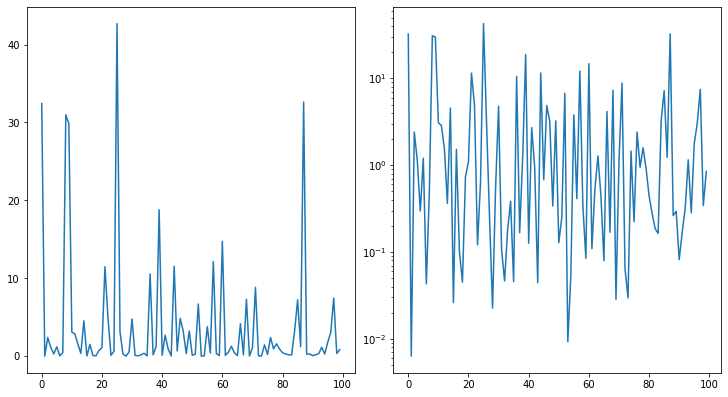

In [64]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5.4), layout='constrained')
xdata = np.arange(len(data1)) # make an ordinal for this
data = 10**data1
axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data)

The scale sets the mapping from data values to spacing along the Axis. This happens in both directions, and gets combined into a transform, which is the way that Matplotlib maps from data coordinates to Axes, Figure, or screen coordinates. See [Transformations Tutorial](https://matplotlib.org/stable/tutorials/advanced/transforms_tutorial.html).

### Tick locators and formatters

Each Axis has a tick locator and formatter that choose where along the Axis objects to put tick marks. A simple interface to this is set_xticks:

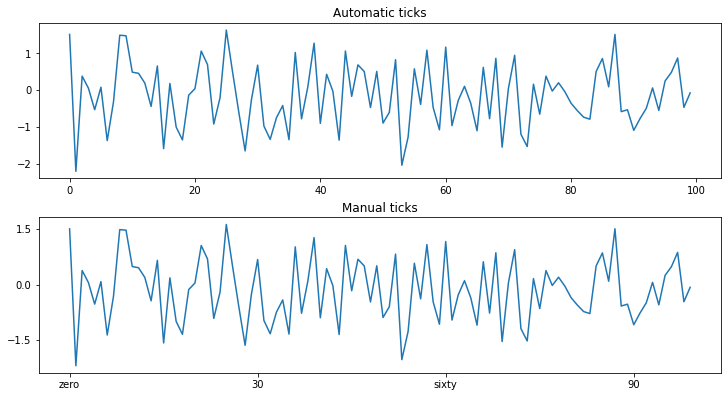

In [68]:
fig, axs = plt.subplots(2, 1, figsize=(10, 5.4), layout='constrained')
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_title('Manual ticks')
axs[1].set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5]) # note that we don't need to specify labels

Different scales can have different locators and formatters; for instance the log-scale above uses [LogLocator](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.LogLocator) and [LogFormatter](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.LogFormatter). See [Tick locators](https://matplotlib.org/stable/gallery/ticks/tick-locators.html) and [Tick formatters](https://matplotlib.org/stable/gallery/ticks/tick-formatters.html) for other formatters and locators and information for writing your own.

### Plotting dates and strings

Matplotlib can handle plotting arrays of dates and arrays of strings, as well as floating point numbers. These get special locators and formatters as appropriate. For dates:

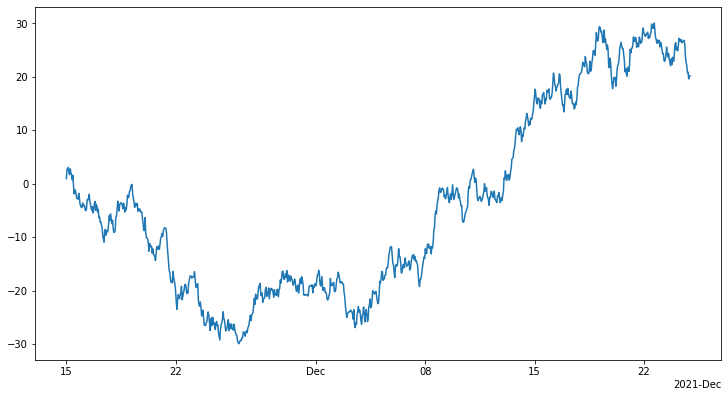

In [82]:
fig, ax = plt.subplots(figsize=(10, 5.4), layout='constrained')
dates = np.arange(np.datetime64('2021-11-15'), np.datetime64('2021-12-25'), np.timedelta64(1, 'h'))

data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf)

For more information see the date examples (e.g. [Date tick labels](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

For strings, we get categorical plotting (see: [Plotting categorical variables](https://matplotlib.org/stable/gallery/lines_bars_and_markers/categorical_variables.html)).

<BarContainer object of 4 artists>

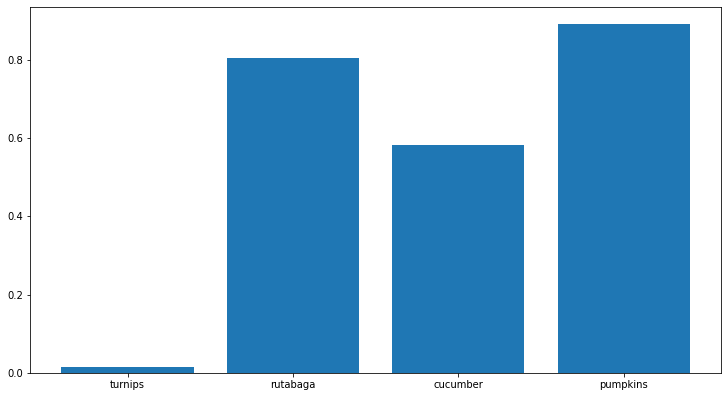

In [84]:
fig, ax = plt.subplots(figsize=(10, 5.4), layout='constrained')
categories = ['turnips', 'rutabaga', 'cucumber', 'pumpkins']

ax.bar(categories, np.random.rand(len(categories)))

One caveat about categorical plotting is that some methods of parsing text files return a list of strings, even if the strings all represent numbers or dates. If you pass 1000 strings, Matplotlib will think you meant 1000 categories and will add 1000 ticks to your plot!
Additional Axis objects

Plotting data of different magnitude in one chart may require an additional y-axis. Such an Axis can be created by using twinx to add a new Axes with an invisible x-axis and a y-axis positioned at the right (analogously for twiny). See [Plots with different scales](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html) for another example.

Similarly, you can add a [secondary_xaxis](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.secondary_xaxis.html#matplotlib.axes.Axes.secondary_xaxis) or [secondary_yaxis](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.secondary_yaxis.html#matplotlib.axes.Axes.secondary_yaxis) having a different scale than the main Axis to represent the data in different scales or units. See [Secondary Axis](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/secondary_axis.html) for further examples.

Text(0.5, 0, 'Angle [rad]')

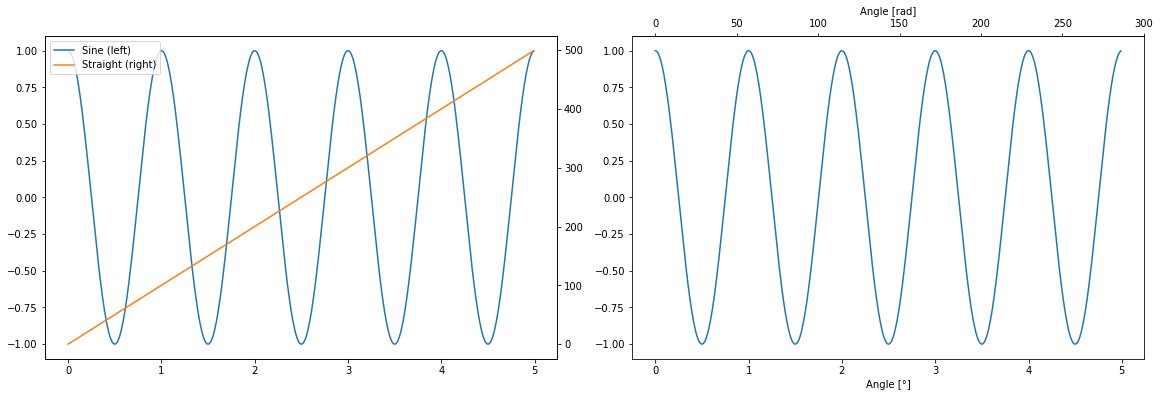

In [101]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(16, 5.4), layout='constrained')
l1, = ax1.plot(t, s)
ax2 = ax1.twinx()
l2, = ax2.plot(t, range(len(t)), 'C1')
ax2.legend([l1, l2], ['Sine (left)', 'Straight (right)'])

ax3.plot(t, s)
ax3.set_xlabel('Angle [°]')
ax4 = ax3.secondary_xaxis('top', functions=(np.rad2deg, np.deg2rad))
ax4.set_xlabel('Angle [rad]')

## Color mapped data

Often we want to have a third dimension in a plot represented by a colors in a colormap. Matplotlib has a number of plot types that do this:

Text(0.5, 1.0, 'scatter()')

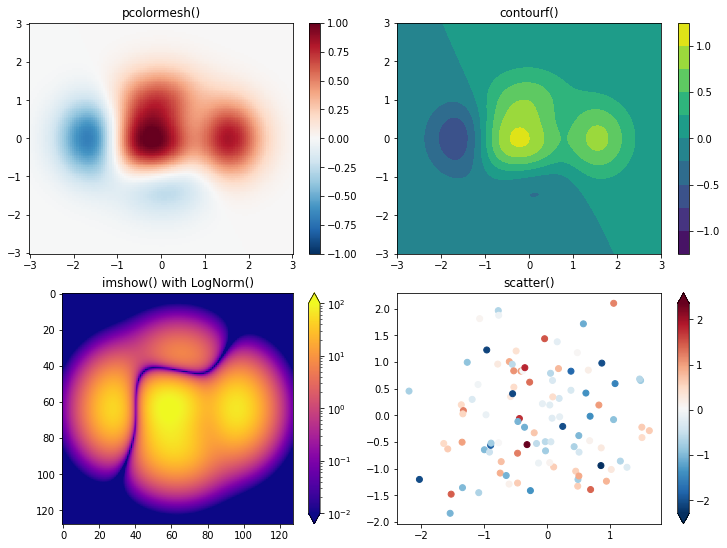

In [116]:
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(2, 2, figsize=(10, 7.5), layout='constrained')
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0,0])
axs[0,0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma', norm=mpl.colors.LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()')

In [ ]:
safd